## Question 1: Load the dataset and display the first 5 rows

In [19]:
import pandas as pd
df = pd.read_csv('ds620_pe03_housing.csv')
df.head()

,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


The dataset contains two columns: median_income and median_house_valu. We will use median_income to predict median_house_value.

## Question 2: Provide summary statistics and a scatter plot of income vs house value


       median_income  median_house_value
count   20640.000000        20640.000000
mean        3.870671       206855.816909
std         1.899822       115395.615874
min         0.499900        14999.000000
25%         2.563400       119600.000000
50%         3.534800       179700.000000
75%         4.743250       264725.000000
max        15.000100       500001.000000


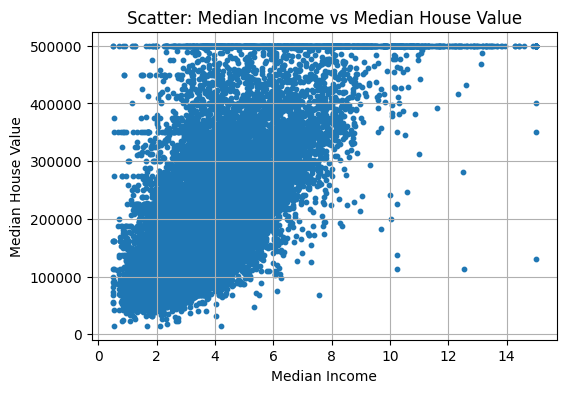

In [12]:
import matplotlib.pyplot as plt
desc = df.describe()
print(desc)

plt.figure(figsize=(6,4))
plt.scatter(df['median_income'], df['median_house_value'], s=10)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter: Median Income vs Median House Value')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between median income and house value. We'll now split the data and fit linear models.

## Question 3: Split the dataset into training and test sets


In [13]:
from sklearn.model_selection import train_test_split

X = df[['median_income']]
y = df['median_house_value'].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('x_train shape:', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape: (14448, 1)
x_test shape:  (6192, 1)
y_train shape: (14448,)
y_test shape:  (6192,)


We used 30% of the data as the test set as required. `X` is kept as a DataFrame for sklearn compatibility; `y` is a 1-D array.

## Question 4: Fit a linear regression model (scikit-learn). Report coefficients and test MSE


Slope (coef): 41819.3269759838
Intercept: 44794.96555604317
Test MSE: 6917979868.0485


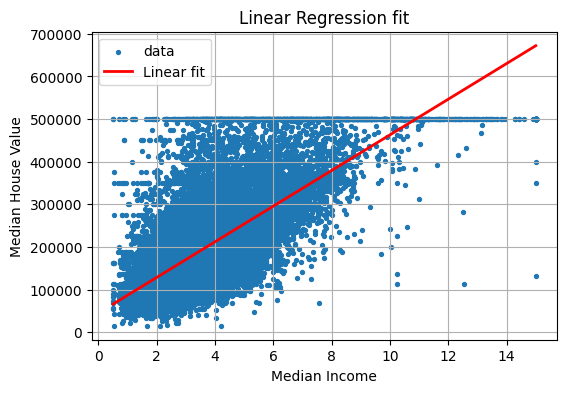

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)

slope = lr.coef_[0]
intercept = lr.intercept_
print('Slope (coef):', slope)
print('Intercept:', intercept)

# Predictions and MSE
y_pred_test = lr.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Test MSE:', mse_test)

# Plot regression line over scatter
import numpy as np
plt.figure(figsize=(6,4))
plt.scatter(df['median_income'], df['median_house_value'], s=8, label='data')
xs = np.linspace(df['median_income'].min(), df['median_income'].max(), 100)
plt.plot(xs, slope*xs + intercept, color='red', linewidth=2, label='Linear fit')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression fit')
plt.legend()
plt.grid(True)
plt.show()

We trained an OLS linear regression model. The slope and intercept describe the best-fit line. The test MSE quantifies prediction error on unseen data.

## Question 5: Implement Batch Gradient Descent (BGD) and compare learned parameters to sklearn


In [15]:
import numpy as np
# Prepare 1D arrays for custom GD
X_gd = df['median_income'].values
Y_gd = df['median_house_value'].values
n = float(len(X_gd))

# BGD with eta=0.01
m = 0.0
b = 0.0
eta = 0.01
epochs = 2000
for i in range(epochs):
    y_pred = m * X_gd + b
    D_m = (-2/n) * np.sum(X_gd * (Y_gd - y_pred))
    D_b = (-2/n) * np.sum(Y_gd - y_pred)
    m -= eta * D_m
    b -= eta * D_b

print('BGD result (eta=0.01): slope:', m, 'intercept:', b)
print('Sklearn result: slope:', slope, 'intercept:', intercept)

# Compute MSE of BGD on test set
y_test_pred_bgd = m * x_test['median_income'].values + b
mse_bgd = mean_squared_error(y_test, y_test_pred_bgd)
print('BGD test MSE:', mse_bgd)
print('Sklearn test MSE:', mse_test)

BGD result (eta=0.01): slope: 41798.085058930716 intercept: 45065.43497007329
Sklearn result: slope: 41819.3269759838 intercept: 44794.96555604317
BGD test MSE: 6917763055.793208
Sklearn test MSE: 6917979868.0485


Batch gradient descent produced parameters close to the closed-form solution found by scikit-learn. Differences depend on learning rate and number of epochs.

## Question 6: Plot MSE over iterations during Batch Gradient Descent

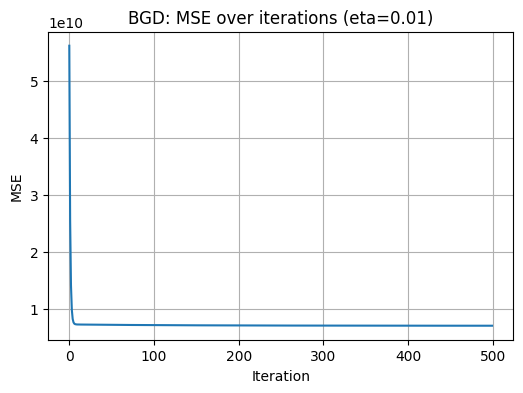

In [16]:
# Record MSE across iterations for visualization
m = 0.0
b = 0.0
eta = 0.01
epochs = 500
errors = []
for i in range(epochs):
    y_pred = m * X_gd + b
    D_m = (-2/n) * np.sum(X_gd * (Y_gd - y_pred))
    D_b = (-2/n) * np.sum(Y_gd - y_pred)
    m -= eta * D_m
    b -= eta * D_b
    errors.append(np.mean((Y_gd - y_pred) ** 2))

plt.figure(figsize=(6,4))
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('BGD: MSE over iterations (eta=0.01)')
plt.grid(True)
plt.show()

The MSE should decrease and eventually plateau as gradient descent approaches the minimum. The rate depends on `eta`.

## Question 7: Run gradient descent for multiple learning rates (0.001, 0.01, 0.1, 0.5) and plot convergence


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_11772/2969089725.py:15: RuntimeWarning: overflow encountered in square
  errors.append(np.mean((y - y_pred) ** 2))
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_11772/2969089725.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  m -= eta_ * D_m
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


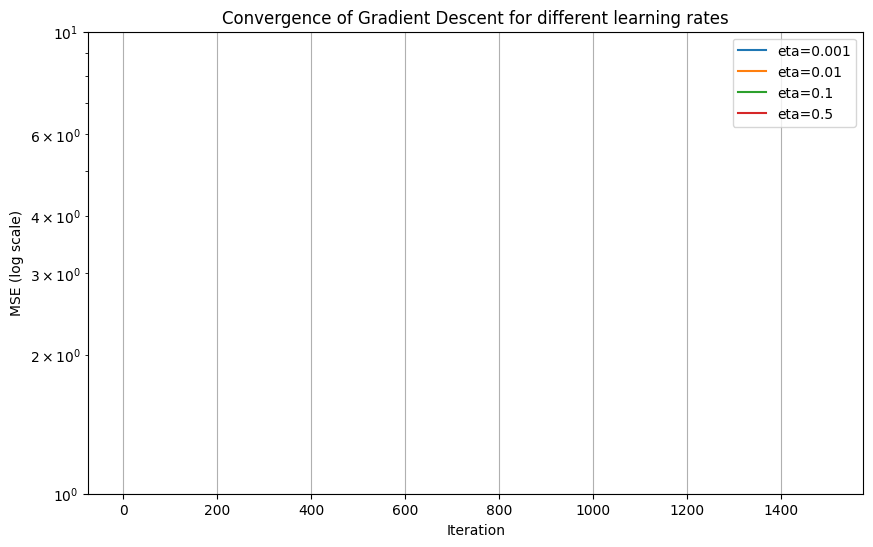

eta=0.001: final slope=45977.3990, intercept=25192.57, final_mse=7088225334.20
eta=0.01: final slope=41821.1505, intercept=44955.76, final_mse=7011314800.51
eta=0.1: final slope=nan, intercept=nan, final_mse=nan
eta=0.5: final slope=nan, intercept=nan, final_mse=nan


In [17]:
import matplotlib.pyplot as plt

def linear_GD(eta_, epochs=2000):
    X = df['median_income'].values
    y = df['median_house_value'].values
    n = float(len(X))
    m, b = 0.0, 0.0
    errors = []
    for i in range(epochs):
        y_pred = m * X + b
        D_m = (-2/n) * np.sum(X * (y - y_pred))
        D_b = (-2/n) * np.sum(y - y_pred)
        m -= eta_ * D_m
        b -= eta_ * D_b
        errors.append(np.mean((y - y_pred) ** 2))
    return m, b, errors

etas = [0.001, 0.01, 0.1, 0.5]
results = {}
plt.figure(figsize=(10,6))
for eta in etas:
    m_eta, b_eta, errs = linear_GD(eta, epochs=1500)
    results[eta] = (m_eta, b_eta, errs)
    plt.plot(errs, label=f'eta={eta}')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('MSE (log scale)')
plt.title('Convergence of Gradient Descent for different learning rates')
plt.legend()
plt.grid(True)
plt.show()

for eta in etas:
    m_eta, b_eta, errs = results[eta]
    print(f'eta={eta}: final slope={m_eta:.4f}, intercept={b_eta:.2f}, final_mse={errs[-1]:.2f}')

Small learning rates (0.001, 0.01) converge gradually. Larger rates (0.1, 0.5) may oscillate or diverge — visible as non-decreasing or erratic MSE curves.

## Question 8: Explain why larger learning rates can take longer to converge or not converge at all

Large learning rates multiply the gradient by a big factor, causing parameter updates that are too large. Instead of stepping progressively toward the minimum of the loss surface, the algorithm may overshoot the minimum, jump to the other side, and keep oscillating. If the step size is large enough relative to the curvature of the loss surface, these oscillations grow, causing divergence. Smaller learning rates produce smaller updates and typically converge, but may require more iterations. In practice, one chooses the largest `eta` that still yields stable convergence, or use adaptive optimizers (e.g., Adam) or learning rate schedules.

## Question 9: Save final model parameters and provide concluding remarks


In [18]:
# Save the sklearn model parameters and BGD parameters in a small dict
final = {
    'sklearn_slope': float(slope),
    'sklearn_intercept': float(intercept),
    'bgd_slope_eta_0_01': float(results[0.01][0]),
    'bgd_intercept_eta_0_01': float(results[0.01][1])
}

import json
with open('ds620_pe03_results.json', 'w') as f:
    json.dump(final, f, indent=2)

print('Saved parameters to /mnt/data/ds620_pe03_results.json')
print(final)

Saved parameters to /mnt/data/ds620_pe03_results.json
{'sklearn_slope': 41819.3269759838, 'sklearn_intercept': 44794.96555604317, 'bgd_slope_eta_0_01': 41821.150525637764, 'bgd_intercept_eta_0_01': 44955.75740715142}


**Conclusion:** The notebook provides a complete pipeline: EDA, model fitting (sklearn), custom batch gradient descent, convergence experiments with multiple learning rates, and explanations. The saved JSON contains the final parameters for easy reference.